In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.manifold import TSNE

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# df = pd.read_csv("teste.csv", index_col=0)

In [2]:
# df[df['ID Aluno']==208149] #id

In [3]:
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# preparing data

In [4]:
primeiroCiC = ['116301', '118001', '118010', '113034', '140481', '145971']
segundoCiC = ['116319', '115045', '118028', '118036', '113042']
terceiroCiC = ['118044', '118052', '113956', '113051', '117366']


primeiroLic1 =['116793', '117366', '145971', '147389', '194221']
segundoLic1 = ['113034', '116301', '125156']
terceiroLic1 = ['115045', '116319', '125172']

primeiroLic2 =['113492', '194221', '113450', '113476']
segundoLic2 = ['113034', '116319', '191027', '150649', '194280']
terceiroLic2 = ['115045', '113093', '117366', '117889']

primeiroEngComp =['113034', '113093', '113476', '117528', '118001', '118010']
segundoEngComp = ['118028', '118036', '113042', '115045', '116319']
terceiroEngComp =['113051', '117242', '170054', '201600', '206075']


primeiroMec = ['114626', '114634', '118010', '113476', '113034', '118001', '168891']
segundoMec = ['168891', '113093', '118028', '118036', '115045', '168874']
terceiroMec = ['113051', '118044', '118052', '168769', '116319']

primeiroRedes = ['113034', '113093', '118001', '118010', '167959']
segundoRedes = ['113042', '115045', '118028', '118036', '169676']
terceiroRedes = ['113051', '113301', '167983', '169749']


undropableCol = ["curso","saiu","Cotista","Raça","Sexo","Tipo de Escola"]#, 'Ingresso_unb'

In [5]:
df0 = pd.read_csv("aluno_quant_Materias_Media_cotistas_0.csv", index_col=0)
df1 = pd.read_csv("aluno_quant_Materias_Media_cotistas_1.csv", index_col=0)
df2 = pd.read_csv("aluno_quant_Materias_Media_cotistas_2.csv", index_col=0)
df3 = pd.read_csv("aluno_quant_Materias_Media_cotistas_3.csv", index_col=0)
df4 = pd.read_csv("aluno_quant_Materias_Media_cotistas_4.csv", index_col=0)
df5 = pd.read_csv("aluno_quant_Materias_Media_cotistas_5.csv", index_col=0)

In [6]:
dfComp = df0[undropableCol+primeiroLic1+segundoLic1+terceiroLic1].fillna(-1)
dfRedes = df1[undropableCol+primeiroRedes+segundoRedes+terceiroRedes].fillna(-1)
dfCic = df2[undropableCol+primeiroCiC+segundoCiC+terceiroCiC].fillna(-1) 
dfMec = df3[undropableCol+primeiroMec+segundoMec+terceiroMec].fillna(-1) 
dfEng = df4[undropableCol+primeiroEngComp+segundoEngComp+terceiroEngComp].fillna(-1) 

# PCA

In [7]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [8]:
def PCA (df, currentLabel = 'saiu'):
    data = (
        df

    )
    
    x = data.iloc[:].values
    y = data[currentLabel].values

    data[currentLabel]
    numColors = len(data[currentLabel].unique())

    sklearn_pca = sklearnPCA(n_components=2)

    Y_sklearn = sklearn_pca.fit_transform(x)

    cmap = get_cmap(numColors+1)
    colorList = [cmap(i) for i in range(1, numColors+1)]


    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(15, 10))
        for lab, col in zip(data[currentLabel].unique(),
                            colorList):
            plt.scatter(Y_sklearn[y==lab, 0],
                        Y_sklearn[y==lab, 1],
                        label=lab,
                        c=col)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend(loc='lower right')
        plt.tight_layout()
        plt.show()

    plt.show()

# TSNE

In [19]:
def formatColor(color):
    return 'rgb('+str(int(color[0]*255))+','+str(int(color[1]*255))+','+str(int(color[2]*255))+')'

    
def tsne(df, currentLabel = 'saiu'):
    a = df
    X = a.values
    X_embedded = TSNE(n_components=2).fit_transform(X)
    
    
    data = a
    Y_sklearn = X_embedded
    y = data[currentLabel].values
    numColors = len(data[currentLabel].unique())

    cmap = get_cmap(numColors+1)
    colorList = [cmap(i) for i in range(1, numColors+1)]


    traceArr = []
    for lab, col in zip(data[currentLabel].unique(),
                        colorList):
        
        trace1 = go.Scatter(
            x=Y_sklearn[y==lab, 0],
            y=Y_sklearn[y==lab, 1],
#             z=Y_sklearn[y==lab, 2],
            mode='markers',
            name = str(lab),
            marker=dict(
                size=5,
                color=formatColor(col),
                opacity=0.8
            )
        )
        traceArr.append(trace1)

    data = traceArr
    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='3d-scatter-colorscale')

In [10]:
# draw2dFrame(a, X_embedded, 'saiu')

# knn

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 

In [12]:
# a = a[a["saiu"]!=0]
# y = a["saiu"]
# X = a.drop(["saiu"], axis = 1)

In [13]:
def knn (df, currentLabel = 'saiu'):
    a = df[df[currentLabel]!=0]
    y = a[currentLabel]
    X = a.drop([currentLabel], axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
    scaler = StandardScaler()  
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test)  
    
    classifier = KNeighborsClassifier(n_neighbors=2)  
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))  
    print(classification_report(y_test, y_pred))

In [14]:
# scaler = StandardScaler()  
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)  
# X_test = scaler.transform(X_test)  

In [15]:
# classifier = KNeighborsClassifier(n_neighbors=2)  
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)  

In [16]:
 
# print(confusion_matrix(y_test, y_pred))  
# print(classification_report(y_test, y_pred))
# knn(X, y)

In [17]:
# a

## Comp

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


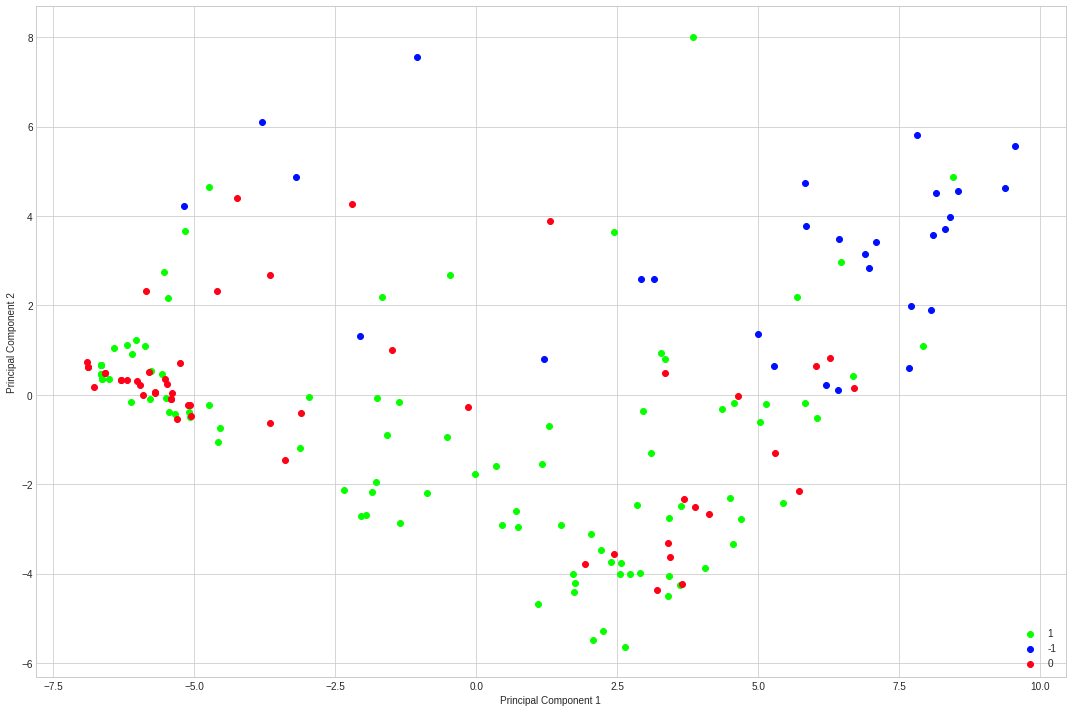

In [21]:
PCA(dfComp)

In [20]:
tsne(dfComp)

In [22]:
knn(dfComp)

[[13  0]
 [ 5 26]]
              precision    recall  f1-score   support

          -1       0.72      1.00      0.84        13
           1       1.00      0.84      0.91        31

   micro avg       0.89      0.89      0.89        44
   macro avg       0.86      0.92      0.88        44
weighted avg       0.92      0.89      0.89        44



/home/pedro/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/home/pedro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/home/pedro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



## Redes

In [ ]:
PCA(dfRedes)

In [ ]:
tsne(dfRedes)

In [ ]:
knn(dfRedes)

## Mec

In [ ]:
PCA(dfMec)

In [ ]:
tsne(dfMec)

In [ ]:
knn(dfMec)

# CIC

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


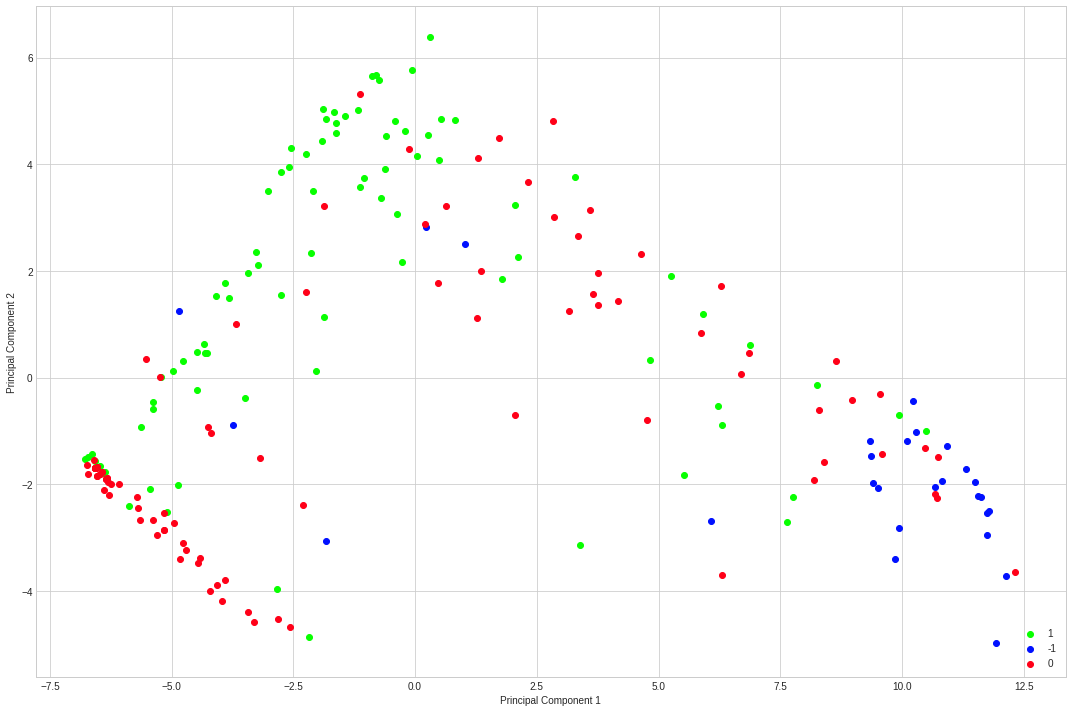

In [23]:
PCA(dfCic)

In [24]:
tsne(dfCic)

In [25]:
knn(dfCic)

[[ 6  1]
 [ 4 29]]
              precision    recall  f1-score   support

          -1       0.60      0.86      0.71         7
           1       0.97      0.88      0.92        33

   micro avg       0.88      0.88      0.88        40
   macro avg       0.78      0.87      0.81        40
weighted avg       0.90      0.88      0.88        40



/home/pedro/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/home/pedro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/home/pedro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



# Eng

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


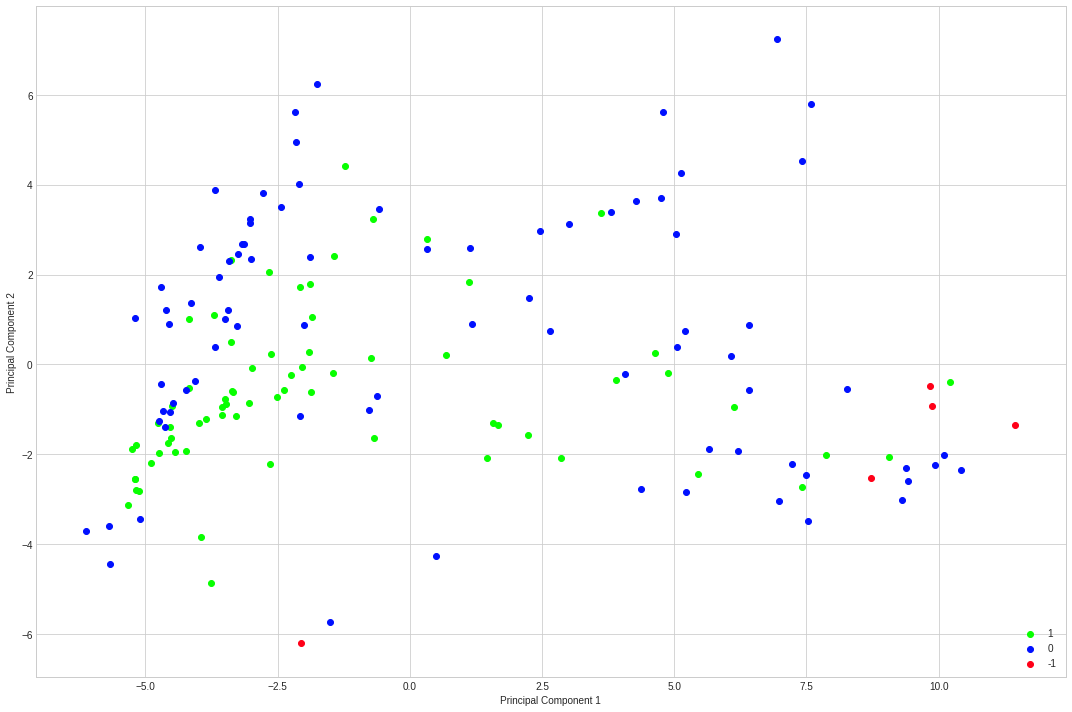

In [26]:
PCA(dfEng)

In [27]:
tsne(dfEng)

In [28]:
knn(dfEng)

[[ 2  0]
 [ 1 24]]
              precision    recall  f1-score   support

          -1       0.67      1.00      0.80         2
           1       1.00      0.96      0.98        25

   micro avg       0.96      0.96      0.96        27
   macro avg       0.83      0.98      0.89        27
weighted avg       0.98      0.96      0.97        27



/home/pedro/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/home/pedro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/home/pedro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

